# Trabalho Final de SGBD

**Nomes:** Arthur Sudbrack Ibarra, Felipe Grosze Nipper de Oliveira, Luiza Lencina, Miguel Torres de Castro.

## Informações do Dataset

**Nome:** Forest Fires Data Set

**Link para o dataset:** [Forest Fires](http://archive.ics.uci.edu/ml/datasets/Forest+Fires)

**Material utilizado como referência para a explicação das colunas:** [nwcg.gov](https://www.nwcg.gov/publications/pms437/cffdrs/fire-weather-index-system)

**Colunas:**
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84

**Coluna alvo:** month

**Objetivo das análises:** O objetivo das análises que abaixo serão feitas é descobrir se é possível identificar com uma taxa considerável de precisão o mês em que uma queimada ocorreu
com base em atributos como a temperatura, velocidade dos ventos ou quantidade de chuva em mm, por exemplo. 

**Justificativa da escolha do modelo:** A justificativa para a escolha do modelo provém da curiosidade do grupo de saber se, na região onde ocorreram as queimadas, os meses possuem características
próprias que os distinguem dos outros, a ponto de ser possível afirmar com certa certeza que uma ocorrência de queimada X se deu em um mês Y.

## Análise Exploratória dos Dados

In [263]:
# Importando recursos necessários.
import pandas as pd
import numpy as np

In [264]:
# Lendo o arquivo CSV.
df = pd.read_csv('forestfires.csv')
# Removendo colunas que não serão analisadas (coordenadas X e Y).
df = df.drop(columns = ['X', 'Y'])

In [265]:
# Exibindo na tela informações do arquivo lido.
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   month   517 non-null    object 
 1   day     517 non-null    object 
 2   FFMC    517 non-null    float64
 3   DMC     517 non-null    float64
 4   DC      517 non-null    float64
 5   ISI     517 non-null    float64
 6   temp    517 non-null    float64
 7   RH      517 non-null    int64  
 8   wind    517 non-null    float64
 9   rain    517 non-null    float64
 10  area    517 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 44.6+ KB


In [266]:
# Mais detalhes a respeito de cada coluna, como média, quantidade, valor mínimo e máximo...
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


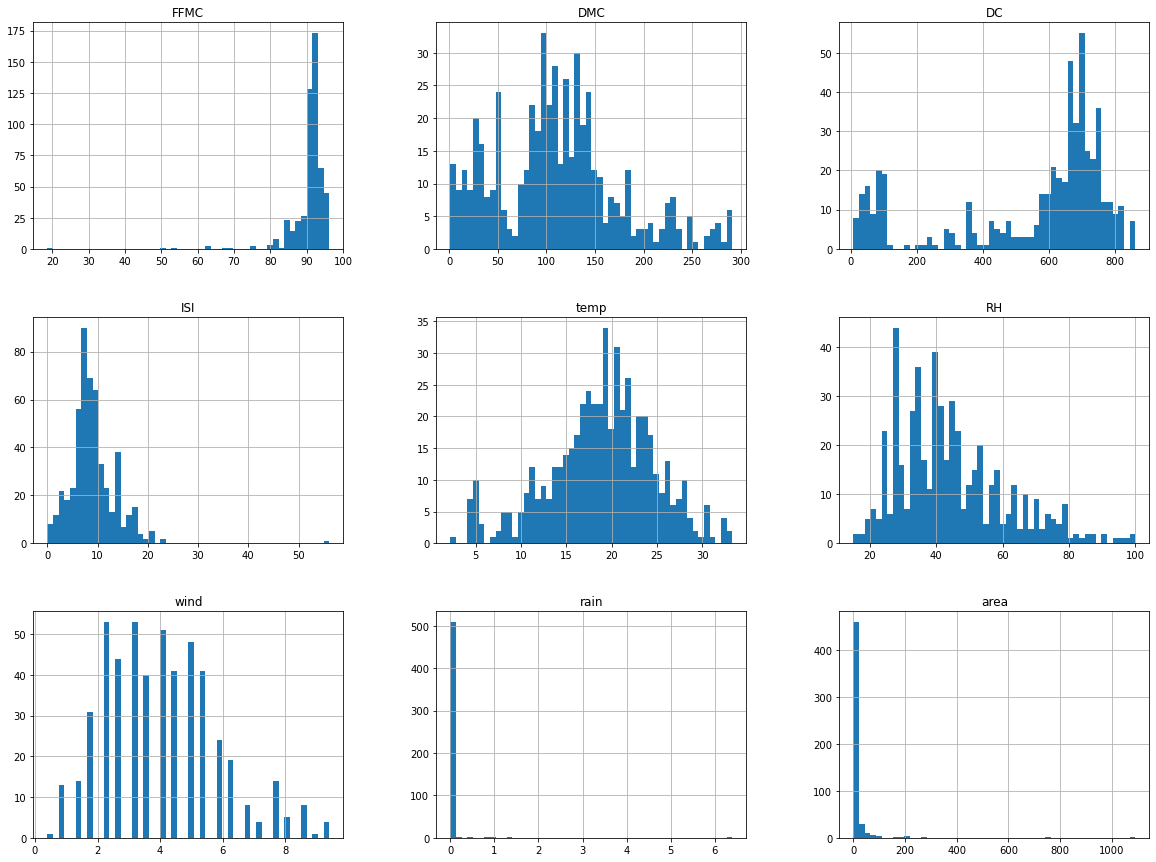

In [267]:
# Importando biblioteca para plotar imagens.
import matplotlib.pyplot as plt

# Histogramas das colunas numéricas.
df.hist(bins = 50, figsize = (20, 15))
plt.show()

# Eixo Y = quantidade de dados.
# Eixo X = valor.

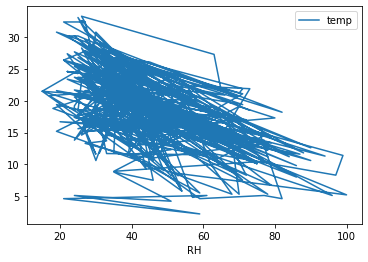

In [268]:
# Gráfico umidade relativa x temperatura.

# RH - Umidade relativa do ar.
# temp - Temperatura.

df.plot(x='RH', y='temp')
plt.show()

# Aqui é interessante observar que a temperatura tende a ser menor quando
# a umidade relativa do ar é maior, ou seja, esses atributos são inversamente proporcionais.

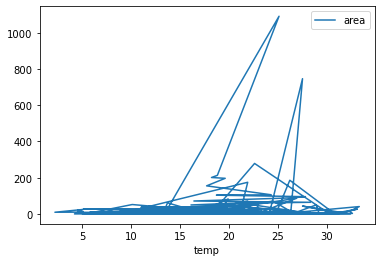

In [269]:
# Gráfico temperatura x área queimada.

# temp - Temperatura.
# area - Área queimada.

df.plot(x = 'temp', y = 'area')
plt.show()

# Um fator interessante a se comentar é o de que inicialmente o grupo havia pensado que,
# em dias de maior temperatura, a área queimada seria maior, no entanto, o gráfico abaixo revela
# que esses dois atributos (temp e area) não parece ter uma correlação forte entre si.

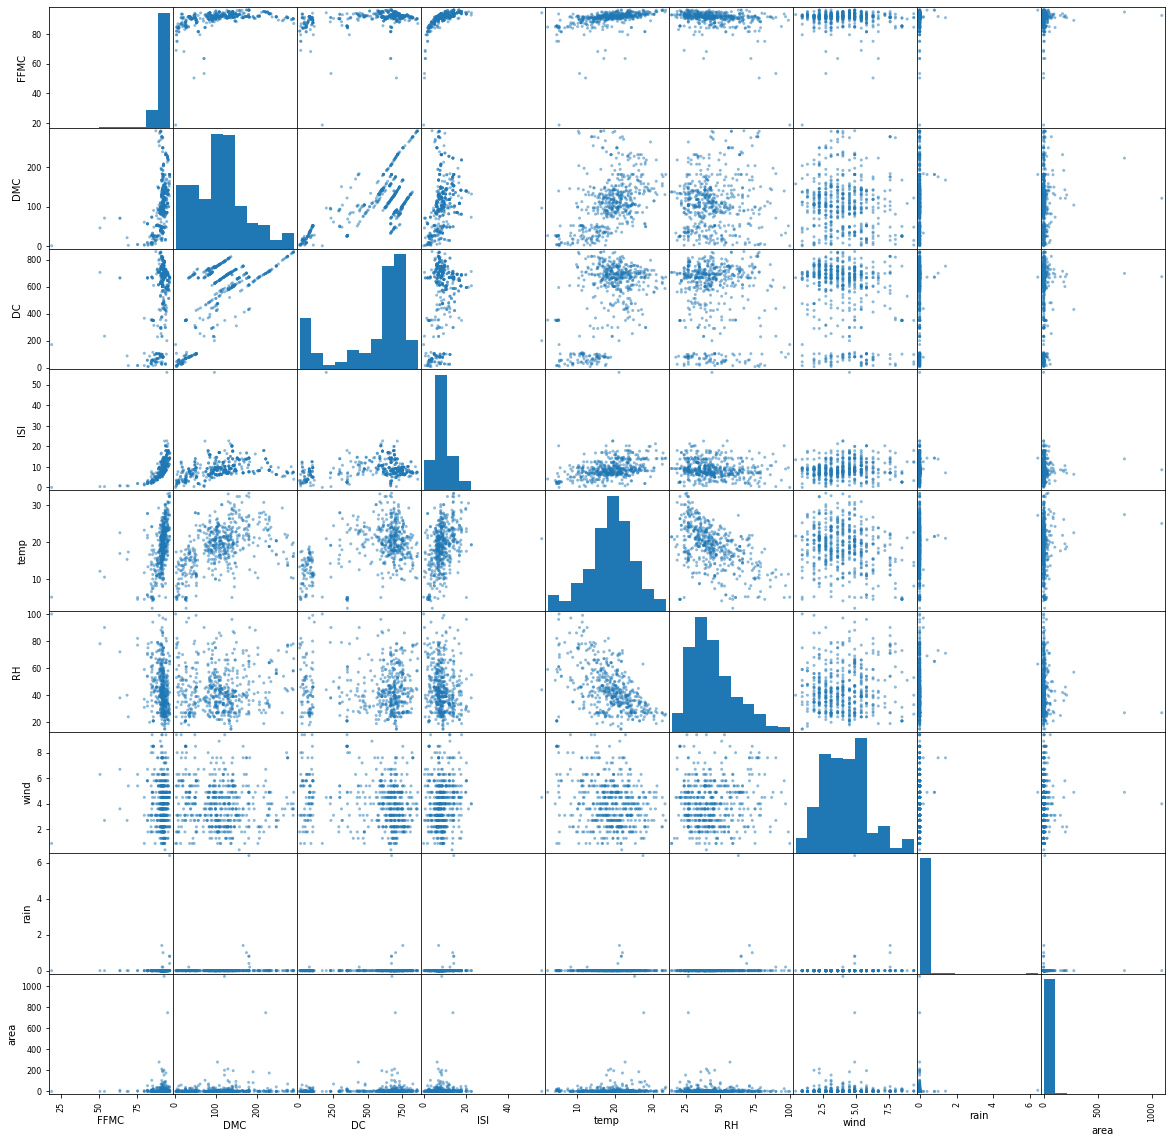

In [270]:
# Análise de correlação entre colunas númericas.
feature_names = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
pd.plotting.scatter_matrix(df[feature_names], figsize = (20, 20))
plt.show()

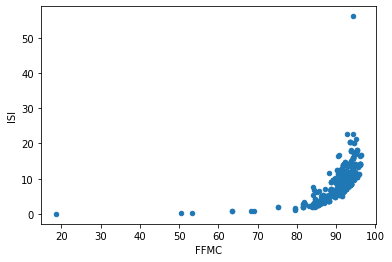

In [271]:
# Ao analisarmos a matriz acima, percebemos que há alguma correlação entre FFMC e ISI.
# Na medida em que FFMC cresce, ISI tende a crescer também.
df.plot(x = 'FFMC', y = 'ISI', kind = 'scatter')
plt.show()

# FFMC:
# Representa a umidade do combustível dos combustíveis de lixo florestal sob a sombra de um dossel da floresta.
# Destina-se a representar as condições de umidade para combustíveis de serapilheira sombreada, o equivalente a
# um intervalo de tempo de 16 horas. Ele varia de 0 a 101.

# ISI:
# Ele integra a umidade do combustível para combustíveis finos mortos e a velocidade do vento de superfície
# para estimarum potencial de propagação. ISI é uma entrada chave para previsões de comportamento de incêndio
# no sistema FBP. É sem unidade e aberto.

In [272]:
# Criando a matriz de correlações.
corr = np.corrcoef(df[feature_names], rowvar = False)
dfcorr = pd.DataFrame(corr, index = feature_names, columns = feature_names)
dfcorr

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000


**OBS:** Note que conforme constatado anteriormente, realmente existe uma correlação entre `FFMC` e `DC` de 53,18%, embora esta não seja muito forte.

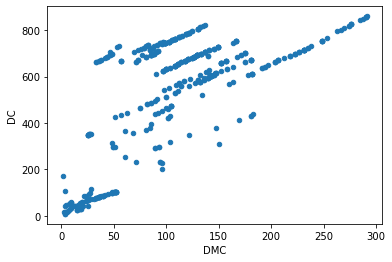

In [273]:
# A matriz também indica que há uma correlação de 68,2% entre DMC e DC.
# Vejamos como se dá o gráfico DMC x DC:
df.plot(x = 'DMC', y = 'DC', kind = 'scatter')
plt.show()

# DMC
# O Código de Umidade Duff (DMC) representa a umidade do combustível de material orgânico decomposto sob a cama. Os projetistas
# do sistema sugerem que representa as condições de umidade para o equivalente a combustíveis de intervalo de tempo de 15 dias
# (ou 360 horas). É sem unidade e aberto. Pode fornecer uma visão para viver o estresse de umidade do combustível.

# DC:
# O Código de Secas (DC), bem como o Índice de Secas de Keetch-Byrum, representa a secagem profunda no solo. Ele se aproxima das
# condições de umidade para o equivalente a combustíveis com intervalo de tempo de 53 dias (1272 horas). É sem unidade, com um
# valor máximo de 1000. Condições extremas de seca produziram valores DC próximos a 800.

### Etapa de pré-processamento

In [274]:
from sklearn.model_selection import train_test_split

# Separando os conjuntos de dados de treino e teste.
df_treino, df_teste = train_test_split(df, test_size = 0.2, random_state = 42)

# Separando a coluna alvo (month) do conjunto de treino.
df_treino_labels = df_treino['month'].copy()
df_treino = df_treino.drop(columns = 'month')

# Separando a coluna alvo (month) do conjunto de teste.
df_teste_labels = df_teste['month'].copy()
df_teste = df_teste.drop(columns = 'month')

In [275]:
# Imports necessários para o pré-processamento.
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [276]:
# Classificando os atributos como numéricos ou categóricos.
nomes_atributos_numericos = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
nomes_atributos_categoricos = ['day']

In [277]:
# Lidando com dados ausentes.
pipeline_atr_numericos = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
])
preproc_completo = ColumnTransformer([
    ('numericos', pipeline_atr_numericos, nomes_atributos_numericos),
    ('categoricos', OneHotEncoder(), nomes_atributos_categoricos),
], sparse_threshold = 0)

In [278]:
# Pré-processamento do conjunto de treino.
X_treino = preproc_completo.fit_transform(df_treino)

# Pré-processamento do conjunto de teste.
X_teste = preproc_completo.transform(df_teste)

# Coluna alvo para os conjuntos de treino e teste.
y_treino = df_treino_labels.values
y_teste = df_teste_labels.values

### Modelo de Regressão Lógica

In [279]:
# Importando o modelo de regressão lógica.
from sklearn.linear_model import LogisticRegression

# Instanciando o modelo de regressão lógica.
log_reg = LogisticRegression(max_iter = 200) # Valor ideal para iterações máximas = 10.

log_reg.fit(X_treino, y_treino)

# As possíveis classes disponíveis:
log_reg.classes_

array(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
       'nov', 'oct', 'sep'], dtype=object)

In [280]:
# Probabilidade estimada pelo modelo de regressão linear.
y_probabilidade_reglog = log_reg.predict_proba(X_teste)
print('PROBABILIDADE ESTIMADA')
print(np.round(y_probabilidade_reglog, decimals = 2))
print()

# Previsões pelo modelo de regressão linear.
y_previsto_reglog = log_reg.predict(X_teste)
print('PREVISÕES')
print(y_previsto_reglog)
print()

# Array de booleans indicando acertos e erros do modelo.
acertos_reglog = y_previsto_reglog == y_teste

# Separando os erros (0) dos acertos (1) e mostrando quantidades.
valores_reglog, quantidades_reglog = np.unique(acertos_reglog, return_counts = True)
print('QUANTIDADE DE ERROS (0) E DE ACERTOS (1)')
print(np.asarray((valores_reglog, quantidades_reglog)))
print()

# Acurácia do modelo em %.
print('ACURÁCIA DO MODELO EM %')
print(str((quantidades_reglog[1]/y_teste.shape[0]) * 100) + ' %')

PROBABILIDADE ESTIMADA
[[0.08 0.01 0.   ... 0.   0.   0.  ]
 [0.   0.91 0.   ... 0.   0.   0.02]
 [0.   0.72 0.   ... 0.   0.   0.19]
 ...
 [0.   0.8  0.   ... 0.   0.   0.17]
 [0.   0.37 0.   ... 0.   0.03 0.45]
 [0.   0.06 0.   ... 0.   0.   0.94]]

PREVISÕES
['feb' 'aug' 'aug' 'sep' 'aug' 'mar' 'mar' 'sep' 'sep' 'aug' 'sep' 'sep'
 'aug' 'aug' 'sep' 'sep' 'aug' 'sep' 'aug' 'aug' 'mar' 'aug' 'dec' 'sep'
 'sep' 'aug' 'mar' 'aug' 'sep' 'sep' 'aug' 'sep' 'sep' 'sep' 'mar' 'jul'
 'aug' 'sep' 'aug' 'sep' 'aug' 'sep' 'aug' 'aug' 'aug' 'aug' 'mar' 'mar'
 'sep' 'aug' 'aug' 'may' 'aug' 'sep' 'aug' 'mar' 'oct' 'aug' 'sep' 'sep'
 'aug' 'aug' 'aug' 'aug' 'aug' 'sep' 'sep' 'aug' 'aug' 'mar' 'sep' 'sep'
 'aug' 'feb' 'mar' 'aug' 'aug' 'aug' 'aug' 'mar' 'feb' 'sep' 'sep' 'mar'
 'mar' 'feb' 'sep' 'sep' 'dec' 'sep' 'aug' 'mar' 'oct' 'aug' 'aug' 'sep'
 'mar' 'aug' 'aug' 'aug' 'feb' 'aug' 'sep' 'sep']

QUANTIDADE DE ERROS (0) E DE ACERTOS (1)
[[ 0  1]
 [23 81]]

ACURÁCIA DO MODELO EM %
77.88461538461539 

### <a name="ac-ob-reg-log" id="ac-ob-reg-log"></a>Acurácias Obtidas - Regressão Lógica

1 iteração: 62,5 % <br>
2-3 iterações: 61.53 % <br>
4 iterações: 69.23 % <br>
5 iterações: 68,26 % <br>
6 iterações: 79,8 % <br>
7-9 iterações: 76 % < x < 79 % <br>
10 iterações: 80,76 % <br>
11+ iterações: x <= 80,76 % <br>

A partir da análise das acurácias obtidas, conclui-se que 10 iterações é o ponto ideal para o modelo de regressão lógica no caso sendo estudado, visto que
após 10 iterações a acurácia do modelo passa apenas a manter-se a mesma ou a decair.

### Modelo de Árvore de Decisão

In [281]:
# Importando o modelo de árvore de decisão.
from sklearn.tree import DecisionTreeClassifier

# Instanciando o modelo de árvore de decisão.
arvore = DecisionTreeClassifier(max_depth = 4) # Valor ideal para a profundidade da árvore = 5.

arvore.fit(X_treino, y_treino)

# As possíveis classes disponíveis:
arvore.classes_

array(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
       'nov', 'oct', 'sep'], dtype=object)

In [282]:
# Probabilidade estimada pela árvore de decisão.
y_probabilidade_arvore = arvore.predict_proba(X_teste)
print('PROBABILIDADE ESTIMADA')
print(np.round(y_probabilidade_arvore, decimals = 2))
print()

# Previsões da árvore de decisão.
y_previsto_arvore = arvore.predict(X_teste)
print('PREVISÕES')
print(y_previsto_arvore)
print()

# Acurácia do modelo em %.
from sklearn.metrics import accuracy_score
print('ACURÁCIA DO MODELO EM %')
print(str(accuracy_score(y_teste,y_previsto_arvore) * 100) + ' %')

PROBABILIDADE ESTIMADA
[[0.   0.   0.26 ... 0.04 0.   0.  ]
 [0.   1.   0.   ... 0.   0.   0.  ]
 [0.   1.   0.   ... 0.   0.   0.  ]
 ...
 [0.   1.   0.   ... 0.   0.   0.  ]
 [0.   0.99 0.   ... 0.   0.   0.01]
 [0.   0.   0.   ... 0.   0.   1.  ]]

PREVISÕES
['jun' 'aug' 'aug' 'sep' 'sep' 'mar' 'mar' 'aug' 'sep' 'aug' 'aug' 'sep'
 'jul' 'aug' 'sep' 'oct' 'aug' 'sep' 'aug' 'aug' 'mar' 'sep' 'jun' 'sep'
 'sep' 'aug' 'feb' 'aug' 'sep' 'sep' 'aug' 'sep' 'sep' 'sep' 'mar' 'jun'
 'aug' 'sep' 'aug' 'aug' 'aug' 'sep' 'aug' 'sep' 'aug' 'jul' 'mar' 'feb'
 'sep' 'jul' 'aug' 'sep' 'aug' 'aug' 'sep' 'mar' 'oct' 'jul' 'sep' 'sep'
 'aug' 'aug' 'aug' 'aug' 'aug' 'sep' 'sep' 'aug' 'aug' 'mar' 'sep' 'sep'
 'jun' 'feb' 'jun' 'aug' 'aug' 'aug' 'aug' 'mar' 'feb' 'sep' 'aug' 'mar'
 'mar' 'feb' 'sep' 'sep' 'jun' 'oct' 'aug' 'mar' 'oct' 'aug' 'aug' 'aug'
 'mar' 'aug' 'aug' 'aug' 'jun' 'aug' 'aug' 'sep']

ACURÁCIA DO MODELO EM %
88.46153846153845 %


### <a name="ac-ob-arvore" id="ac-ob-arvore"></a>Acurácias Obtidas - Árvore de Decisão

*OBS:* profundidade = altura da árvore, ou seja, o maior caminho entre a raiz e todas as folhas.

profundidade = 1: 58,65 % <br>
profundidade = 2: 80,76 % <br>
profundidade = 3: 83,65 % <br>
profundidade = 4: 88,46 % <br>
profundidade = 5: 89,42 % <br>
profundidade = 6+: x <= 89,42 % <br>

A partir da análise das acurácias obtidas, conclui-se que 5 é a profundidade ideal para a árvore de decisão no caso de estudo em questão, uma vez que, a partir de (profundidade = 6), a acurácia
obtida não ultrapassa o valor de 89,42% obtido com (profundidade = 5).

Note que o grupo optou por utilizar uma profundidade de valor 4 no código implementando, pois a visualização da árvore era muito prejudicada com números de profundidade > 4.

### Visualização da Árvore

[Text(2901.6, 1956.96, 'DC <= 0.472\ngini = 0.747\nsamples = 100.0%\nvalue = [0.017, 0.339, 0.015, 0.044, 0.002, 0.07, 0.031, 0.102\n0.002, 0.002, 0.031, 0.344]\nclass = sep'),
 Text(1450.8, 1522.0800000000002, 'DC <= -0.289\ngini = 0.737\nsamples = 52.1%\nvalue = [0.033, 0.442, 0.028, 0.084, 0.005, 0.13, 0.06, 0.195\n0.005, 0.005, 0.009, 0.005]\nclass = aug'),
 Text(892.8, 1087.2, 'DC <= -1.786\ngini = 0.782\nsamples = 27.8%\nvalue = [0.061, 0.026, 0.052, 0.157, 0.009, 0.2, 0.113, 0.365\n0.009, 0.009, 0.0, 0.0]\nclass = mar'),
 Text(446.4, 652.3200000000002, 'DMC <= -1.481\ngini = 0.545\nsamples = 16.5%\nvalue = [0.103, 0.015, 0.0, 0.25, 0.0, 0.0, 0.0, 0.618, 0.015\n0.0, 0.0, 0.0]\nclass = mar'),
 Text(223.2, 217.44000000000005, 'gini = 0.349\nsamples = 4.6%\nvalue = [0.158, 0.0, 0.0, 0.789, 0.0, 0.0, 0.0, 0.053, 0.0\n0.0, 0.0, 0.0]\nclass = feb'),
 Text(669.5999999999999, 217.44000000000005, 'gini = 0.291\nsamples = 11.9%\nvalue = [0.082, 0.02, 0.0, 0.041, 0.0, 0.0, 0.0, 0.837, 0.02\

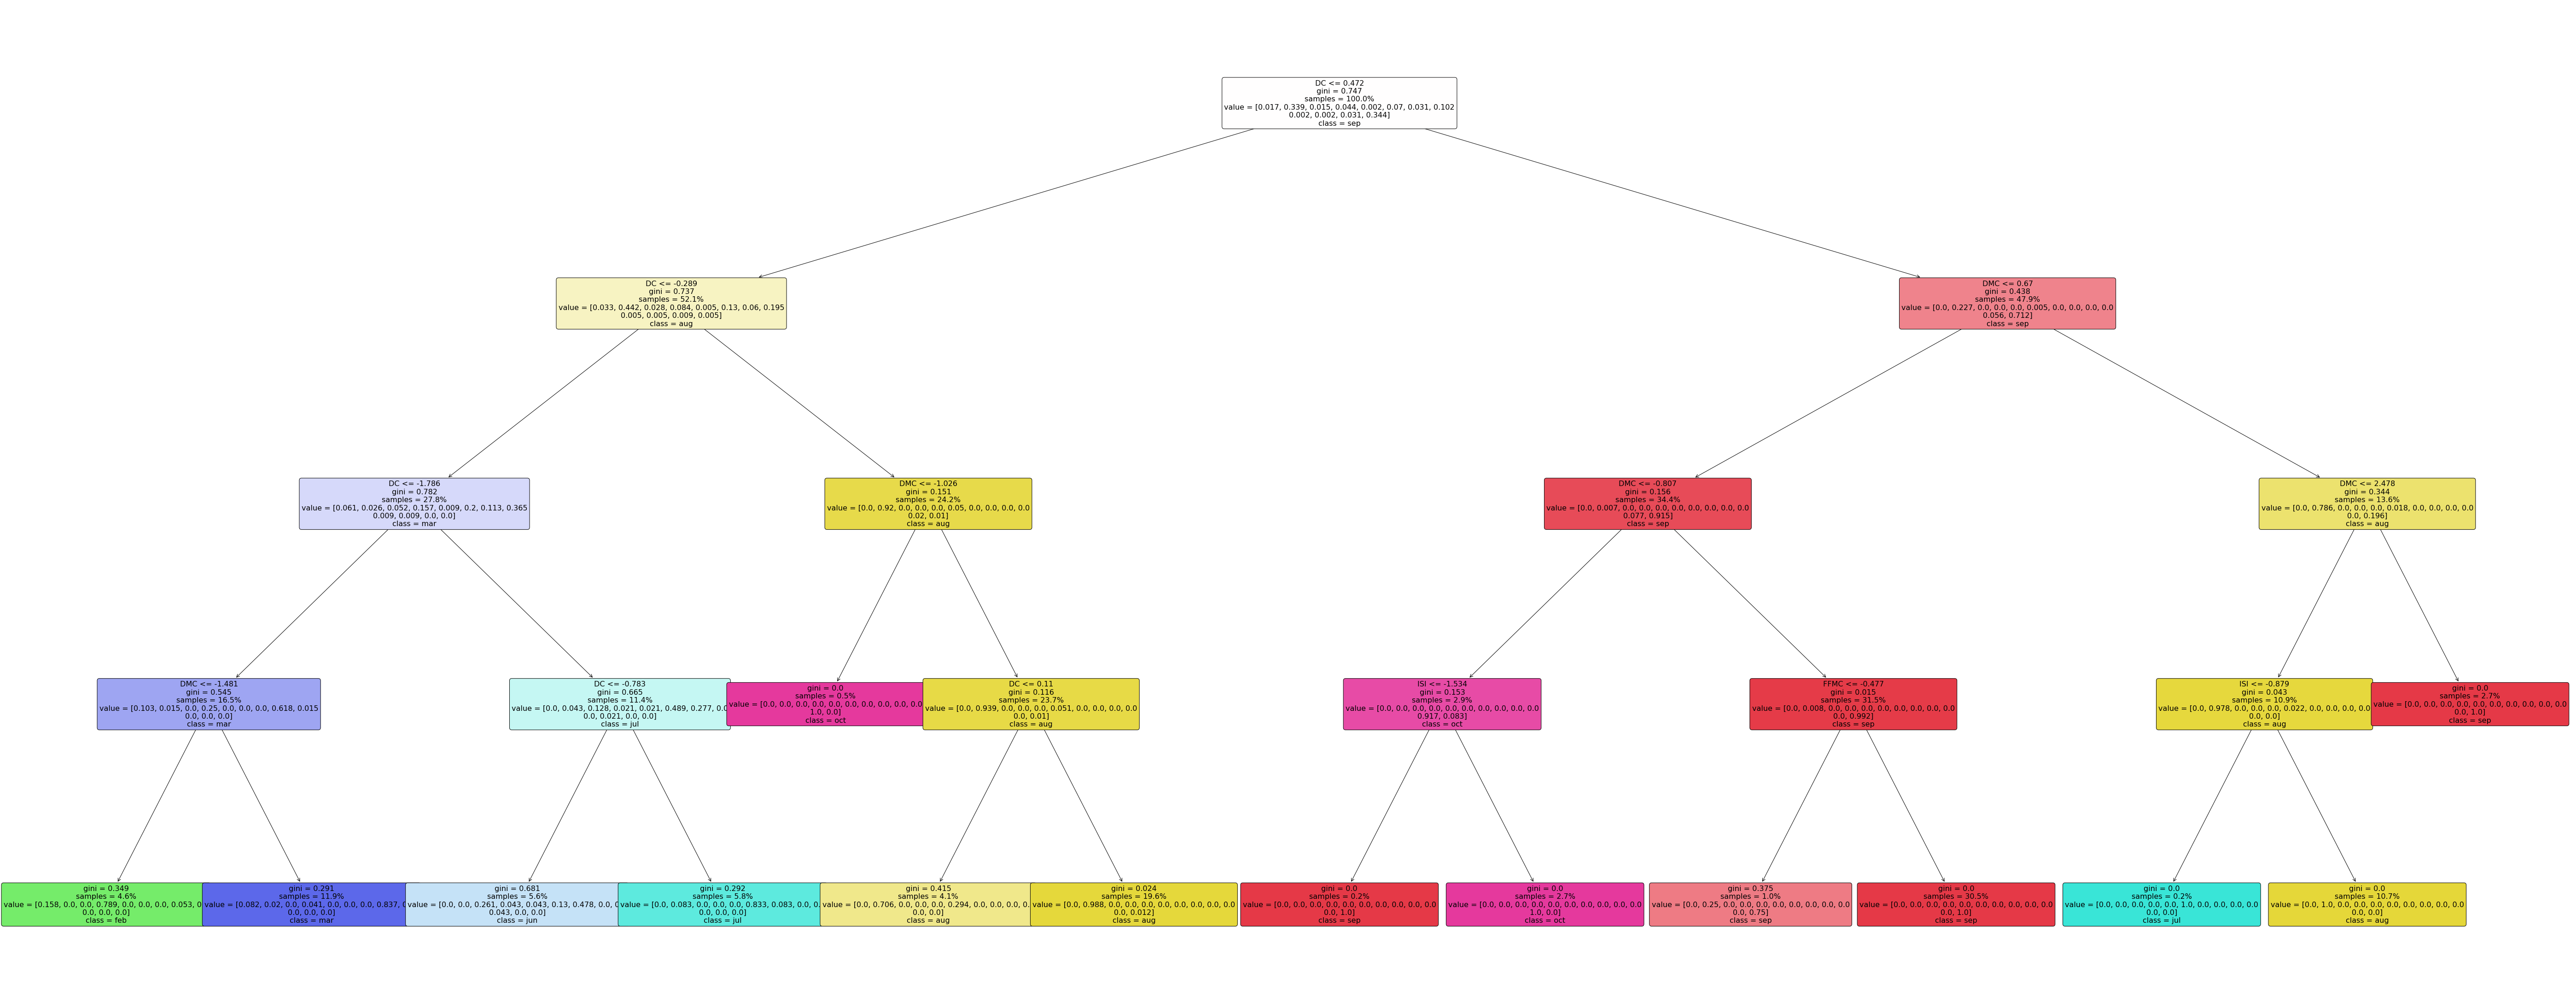

In [283]:
# Importando bibliotecas necessárias.
from sklearn import tree

# Obtendo os nomes dos atributos.
nomes_atributos = np.append(nomes_atributos_numericos, preproc_completo.named_transformers_['categoricos'].get_feature_names())

plt.figure(figsize = (100, 40))

# Plotando a árvore.
tree.plot_tree(arvore,
               feature_names = nomes_atributos,
               class_names = arvore.classes_,
               rounded = True,
               filled = True,
               proportion = True,
               fontsize = 16)

**Definição de DC (atributo importante na análise)**

O Código de Secas (DC), assim como o Índice de Secas de Keetch-Byrum, representa a secagem profunda do solo. Ele se aproxima das condições de umidade para o equivalente a combustíveis com intervalo de tempo de 53 dias (1272 horas). É sem unidade, com um valor máximo de 1000. Condições extremas de seca produziram valores DC próximos a 800.

## Conclusão

Após testados os modelos de regressão lógica e de árvore de decisão, o grupo pôde concluir que, em termos de desempenho e com 20% dos dados sendo utilizados para teste, destacou-se o modelo de árvore de decisão com uma taxa de acerto máxima de 89,42% em relação à classificação de atributos no conjunto de teste, conforme destacado na seção [Acurácias Obtidas - Árvore de Decisão](#ac-ob-arvore). O modelo de regressão lógica, por sua vez, obteve uma taxa de acerto máxima de 80,76%, conforme exposto na seção [Acurácias Obtidas - Regressão Lógica](#ac-ob-reg-log), o que caracteriza uma taxa de erro quase 10% superior àquela obtida com o modelo de árvore de decisão. É importante ressaltar, todavia, que o dataset utilizado é relativamente pequeno, e, por conta disso, os tempos de treinamento foram desprezíveis em ambos os modelos. Sendo assim, com datasets contendo milhões de linhas, por instância, seria possível que a conclusão houvesse sido diferente no momento em que fossem analisados os tempos de execução dos algoritmos de ambos os modelos.